In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [ ]:
!pip install SciencePlots

In [1]:
import geopandas
from geopandas import GeoDataFrame
import geoplot
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['science','no-latex'])

In [12]:
geojsons = os.listdir('geojson/')
locations = pd.DataFrame(columns=('number', 'district', 'geometry'))
i = 0
for file in geojsons:
  if file.endswith('geojson'):
    df = geopandas.read_file(f'geojson/{file}')
    district = file.split('.')[0].capitalize() 
    locations.loc[i] = [i + 1, district, df.iloc[0, 0]]
    i += 1
  # if i == 2:
  #   break
gdf = GeoDataFrame(locations, crs="EPSG:4326")
# Project to NAD83 projected crs
gdf = gdf.to_crs(epsg=4326)

# Access the centroid attribute of each polygon
gdf['centroid'] = gdf.centroid
gdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,number,district,geometry,centroid
0,1,Tougue,GEOMETRYCOLLECTION (MULTIPOLYGON (((-11.99912 ...,POINT (-11.51692 11.49970)
1,2,Kenema,GEOMETRYCOLLECTION (MULTIPOLYGON (((-11.60248 ...,POINT (-11.20509 7.93789)
2,3,Rivercess,GEOMETRYCOLLECTION (MULTIPOLYGON (((-9.55941 5...,POINT (-9.31153 5.80653)
3,4,Koinadugu,GEOMETRYCOLLECTION (MULTIPOLYGON (((-12.13512 ...,POINT (-11.34565 9.45363)
4,5,Macenta,GEOMETRYCOLLECTION (MULTIPOLYGON (((-9.90049 8...,POINT (-9.34830 8.36495)


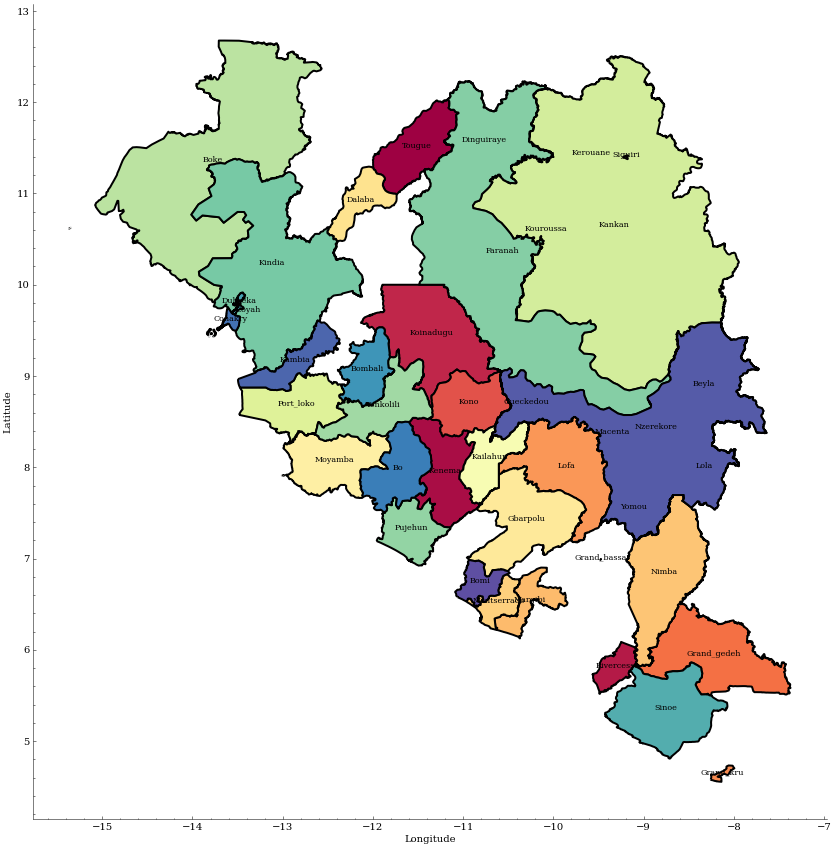

In [14]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
cmap = matplotlib.cm.get_cmap('Spectral', 50)
gdf.plot(figsize = (15,15), cmap = cmap, edgecolor = 'k', linewidth = 2)
for idx, row in gdf.iterrows():
  plt.annotate(s=row['district'], xy = (row['centroid'].x, row['centroid'].y), ha='center', color = 'k', fontsize = 8)

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.savefig('ebola_map.pdf')

In [13]:
# import mapclassify
# number  = gdf['number']
# scheme = mapclassify.Quantiles(number, k=1)
# geoplot.choropleth(
#     gdf, hue=number, scheme=scheme,
#     cmap='Greens', figsize=(8, 4)
# )